# K-Nearest Neighbors


## 1.환경준비

### (1) Import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### (2) data loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

|	변수	|	설명	|
|	----	|	----	|
|	**medv**	|	**타운별 집값(중위수), target**	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과한 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율, 편의시설(관공서, 주요 시설)	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 이해

### (1) 둘러보기

In [4]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# 각 칼럼의 타입을 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 3.데이터 준비

### (1) 데이터 정리

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.drop(['black'], axis = 1, inplace = True)

### (2) 데이터분할1 : x, y 나누기

In [6]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

### (5) 데이터분할2 : train : validation 나누기

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling
KNN 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [8]:
from sklearn.preprocessing import MinMaxScaler  # 0~1 값으로 변환

scaler = MinMaxScaler()  # 선언
x_train_s1 = scaler.fit_transform(x_train)  # fit_transform : fit + transform = 기준을 찾고, 적용
x_val_s1 = scaler.transform(x_val)  # 적용만,   numpy로 변환해줌

In [12]:
from sklearn.preprocessing import StandardScaler # 모든 표준편차를 0~1로 바꿔줌

scaler2 = StandardScaler()
x_train_s2 = scaler2.fit_transform(x_train)
x_val_s2 = scaler2.transform(x_val)

In [10]:
x_train_s1 = pd.DataFrame(x_train_s1, columns = list(x))  # 칼럼이름 지정 필요!!
x_train_s2 = pd.DataFrame(x_train_s2, columns = list(x))

In [11]:
x_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.204705,11.478814,10.756073,0.070621,0.548530,6.309133,67.485311,3.900144,9.039548,397.790960,18.373164,12.129209
std,8.554879,22.969625,6.894126,0.256554,0.115102,0.689033,27.894307,2.113877,8.413440,163.905474,2.191546,6.739158
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.863000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000
25%,0.071848,0.000000,4.935000,0.000000,0.448000,5.889500,42.950000,2.168250,4.000000,277.000000,17.000000,6.735000
50%,0.219655,0.000000,8.350000,0.000000,0.524000,6.209000,74.850000,3.361800,5.000000,329.500000,18.850000,10.925000
75%,2.588280,20.000000,18.100000,0.000000,0.614000,6.618750,93.875000,5.226975,8.000000,437.000000,20.200000,15.820000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,37.970000


In [12]:
x_train_s1.describe()  # minmax방식

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.035949,0.114788,0.377422,0.070621,0.330976,0.503112,0.654099,0.289180,0.349546,0.401130,0.614166,0.286954
std,0.096155,0.229696,0.252717,0.256554,0.238801,0.141718,0.296748,0.220639,0.365802,0.313395,0.233143,0.185959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000737,0.000000,0.164040,0.000000,0.122407,0.416804,0.393085,0.108411,0.130435,0.170172,0.468085,0.138107
50%,0.002398,0.000000,0.289223,0.000000,0.280083,0.482517,0.732447,0.232989,0.173913,0.270554,0.664894,0.253725
75%,0.029021,0.200000,0.646628,0.000000,0.466805,0.566794,0.934840,0.427670,0.304348,0.476099,0.808511,0.388797
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
x_train_s2.describe()  # standard 방식

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,-1.379938e-17,7.025140e-17,8.969598e-17,-1.332895e-17,-3.048409e-16,-6.443371e-16,-1.793920e-16,6.711518e-17,-1.129040e-17,-5.017957e-17,3.070363e-16,2.195356e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-3.743960e-01,-5.004462e-01,-1.495570e+00,-2.756589e-01,-1.387952e+00,-3.555120e+00,-2.207344e+00,-1.312501e+00,-9.569127e-01,-1.281763e+00,-2.638016e+00,-1.545286e+00
25%,-3.667255e-01,-5.004462e-01,-8.455478e-01,-2.756589e-01,-8.746373e-01,-6.098789e-01,-8.808263e-01,-8.204568e-01,-5.998357e-01,-7.379981e-01,-6.274599e-01,-8.015607e-01
50%,-3.494235e-01,-5.004462e-01,-3.494974e-01,-2.756589e-01,-2.134189e-01,-1.455293e-01,2.643949e-01,-2.550316e-01,-4.808100e-01,-4.172382e-01,2.178877e-01,-1.789413e-01
75%,-7.215742e-02,3.715014e-01,1.066752e+00,-2.756589e-01,5.696029e-01,4.499863e-01,9.473991e-01,6.285651e-01,-1.237329e-01,2.395560e-01,8.347630e-01,5.484387e-01
max,1.004022e+01,3.859292e+00,2.467023e+00,3.627671e+00,2.805565e+00,3.511133e+00,1.167289e+00,3.226202e+00,1.780678e+00,1.913617e+00,1.657263e+00,3.839852e+00


## 4.모델링 : KNN

### (1) import

In [13]:
# 모델링용
from sklearn.neighbors import KNeighborsRegressor    

# 회귀모델 평가용
from sklearn.metrics import* 

### (2) 모델선언

In [15]:
model = KNeighborsRegressor() # k : 기본값 5

### (3) 모델링(학습)

In [16]:
model.fit(x_train_s1, y_train)

KNeighborsRegressor()

### (4) 검증 : 예측

In [17]:
pred1 = model.predict(x_val_s1)

### (5) 검증 : 평가

In [20]:
# RMSE
mean_squared_error(y_val, pred1, squared=False)

4.227564933050456

In [21]:
# MAE
mean_absolute_error(y_val, pred1)

3.035

In [22]:
# MAPE : 평균 오차율
mean_absolute_percentage_error(y_val, pred1)

0.16339021011462934

In [23]:
# 1 - MAPE : 정확도
1-mean_absolute_percentage_error(y_val, pred1)

0.8366097898853706

## 5.Hyper Parameter

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* n_neighbors : k 의 갯수. k가 달라지면 예측결과도 달라지고, 성능도 달라집니다!
* metric : 거리계산 방식.
    * euclidean : 유클리디안 거리 :  sqrt(a^2 + b^2)
    * manhattan : 맨하탄거리 : a + b

In [24]:
# model1 : n_neighbors = 10, metric = 'euclidean'
model1 = KNeighborsRegressor(n_neighbors = 10, metric = 'euclidean')
model1.fit(x_train_s1, y_train)
pred1 = model1.predict(x_val_s1)

In [25]:
# model2 : n_neighbors = 10, metric = 'manhattan'
model2 = KNeighborsRegressor(n_neighbors = 10, metric = 'manhattan')
model2.fit(x_train_s1, y_train)
pred2 = model2.predict(x_val_s1)

In [26]:
print(f'metric = euclidean : rmse {mean_squared_error(y_val, pred1, squared = False)}')
print(f'metric = manhattan : rmse {mean_squared_error(y_val, pred2, squared = False)}')

metric = euclidean : rmse 4.841955074901916
metric = manhattan : rmse 4.420933680260671


In [27]:
print(f'metric = euclidean : mae {mean_absolute_error(y_val, pred1)}')
print(f'metric = manhattan : mae {mean_absolute_error(y_val, pred2)}')

metric = euclidean : mae 3.462763157894737
metric = manhattan : mae 3.2408552631578953


In [28]:
print(f'metric = euclidean : mape {mean_absolute_percentage_error(y_val, pred1)}')
print(f'metric = manhattan : mape {mean_absolute_percentage_error(y_val, pred2)}')

metric = euclidean : mape 0.18505949742155064
metric = manhattan : mape 0.17819962243785456


## 6.연습문제
* 다음의 조건을 조정하며 모델을 생성하고 성능을 비교해 봅시다.
* 조건
    * 스케일링 데이터 : 하이퍼파라미터는 default로 두고, 스케일링 데이터만 달리하며 비교해 봅시다.
        * 정규화 : x_train_s1, x_val_s1
        * 표준화 : x_train_s2, x_val_s2
    * k : 
        * k 값을 1에서 50까지 1씩 증가시켜가며 
        * 성능 rmse, mae, mape를 구하고 최적의 k 값을 찾아 봅시다.

### (1) 스케일링 데이터 비교.

In [29]:
# 정규화
model3 = KNeighborsRegressor()
model3.fit(x_train_s1, y_train)
pred1 = model3.predict(x_val_s1)

In [30]:
# 표준화
model4 = KNeighborsRegressor()
model4.fit(x_train_s2, y_train)
pred2 = model4.predict(x_val_s2)

In [31]:
print(f'정규화 : rmse {mean_squared_error(y_val, pred1, squared = False)}')
print(f'표준화 : rmse {mean_squared_error(y_val, pred2, squared = False)}')

정규화 : rmse 4.227564933050456
표준화 : rmse 4.191138835309815


In [32]:
print(f'정규화 : mae {mean_absolute_error(y_val, pred1)}')
print(f'표준화 : mae {mean_absolute_error(y_val, pred2)}')

정규화 : mae 3.035
표준화 : mae 2.971710526315789


In [33]:
print(f'정규화 : mape {mean_absolute_percentage_error(y_val, pred1)}')
print(f'표준화 : mape {mean_absolute_percentage_error(y_val, pred2)}')

정규화 : mape 0.16339021011462934
표준화 : mape 0.17378681288843553


### (2) k 값

In [34]:
k_values = range(1,51)
rmse, mae, mape = [],[],[]

for k in k_values :
    m = KNeighborsRegressor(n_neighbors = k)
    m.fit(x_train_s1, y_train)
    p = m.predict(x_val_s1)
    rmse.append(mean_squared_error(y_val, p, squared = False))
    mae.append(mean_absolute_error(y_val, p))
    mape.append(mean_absolute_percentage_error(y_val, p))

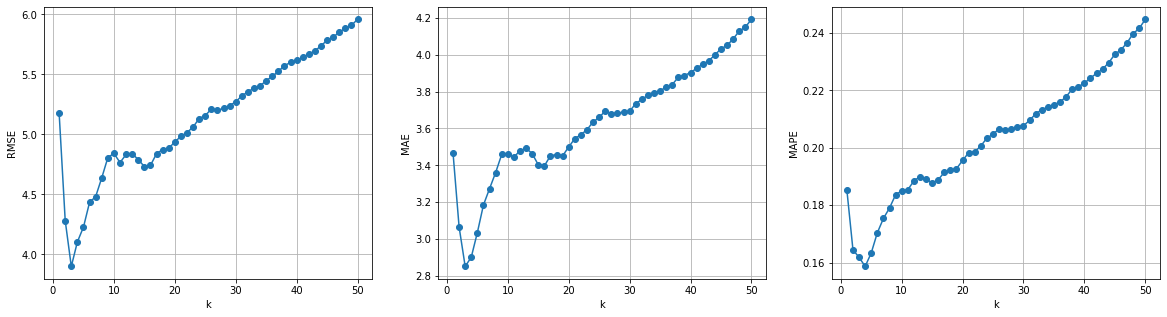

In [35]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.plot(k_values, rmse, marker = 'o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid()

plt.subplot(1,3,2)
plt.plot(k_values, mae, marker = 'o')
plt.ylabel('MAE')
plt.xlabel('k')
plt.grid()

plt.subplot(1,3,3)
plt.plot(k_values, mape, marker = 'o')
plt.ylabel('MAPE')
plt.xlabel('k')
plt.grid()

plt.show()

In [36]:
# 정규화
model3 = KNeighborsRegressor(n_neighbors=15)
model3.fit(x_train_s1, y_train)
pred3 = model3.predict(x_val_s1)

In [37]:
# 표준화
model4 = KNeighborsRegressor(n_neighbors=15)
model4.fit(x_train_s2, y_train)
pred4 = model4.predict(x_val_s2)

In [38]:
print('MAE', mean_absolute_error(y_val, pred3))
print('MAE', mean_absolute_error(y_val, pred4))
print('MSE', mean_squared_error(y_val, pred3))
print('MSE', mean_squared_error(y_val, pred4))
print('RMSE', mean_squared_error(y_val, pred3, squared=False))
print('RMSE', mean_squared_error(y_val, pred4, squared=False))
print('MAPE', mean_absolute_percentage_error(y_val, pred3))
print('MAPE', mean_absolute_percentage_error(y_val, pred4))

MAE 3.4026754385964915
MAE 3.161666666666667
MSE 22.38640555555555
MSE 18.9442701754386
RMSE 4.731427433191335
RMSE 4.3525015997054615
MAPE 0.1877927358078493
MAPE 0.18334006880079667
